# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

- Test Text
- 
- 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
mouse_results_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [2]:
# Checking the number of mice.
total_mouse_ids = mouse_results_df['Mouse ID'].nunique()
total_mouse_ids #249 mice who were identified

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

#subset=['Mouse ID', 'Timepoint'] specifies that you want to check for duplicates based on these two columns.
#keep=False ensures that all instances of the duplicates are marked as True.

duplicate_mice = mouse_results_df[mouse_results_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ids = mouse_results_df[mouse_results_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

# Get all data for the duplicate Mouse IDs
duplicate_mouse_data = mouse_results_df[mouse_results_df['Mouse ID'].isin(duplicate_mouse_ids)]

# Display the data for the duplicate Mouse IDs
#print(duplicate_mouse_data)

duplicate_mouse_data



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_results_df = mouse_results_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

# Display the clean DataFrame
clean_mouse_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count = clean_mouse_results_df['Mouse ID'].nunique()
print("clean mice in DataFrame:", unique_mice_count)

# Check for duplicates in the clean DataFrame
has_duplicates = clean_mouse_results_df.duplicated(subset=['Mouse ID', 'Timepoint']).any()

if has_duplicates:
    print("There are duplicates in the clean DataFrame.")
else:
    print("There are no duplicates in the clean DataFrame.")

clean mice in DataFrame: 249
There are no duplicates in the clean DataFrame.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = clean_mouse_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    standard_deviation='std',
    SEM=lambda x: st.sem(x)  # Using scipy to calculate SEM
).reset_index()

# Display the summary statistics table
summary_statistics

,Drug Regimen,mean,median,variance,standard_deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Generate summary statistics in a single line
summary_statistics = clean_mouse_results_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    standard_deviation='std',
    SEM=lambda x: st.sem(x)
)

# Display the summary statistics table
summary_statistics

#not really sure what this part is asking for?????

,mean,median,variance,standard_deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

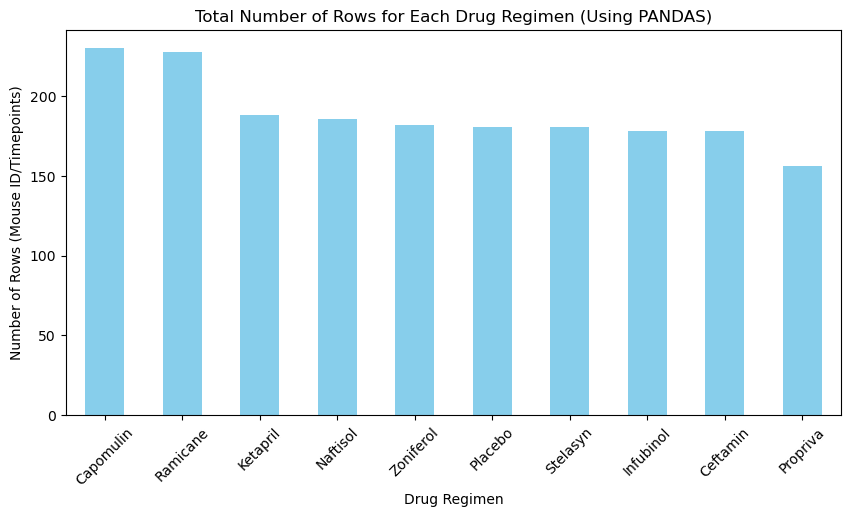

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#clean_mouse_results_df

# Group by 'Drug Regimen' and count the number of rows for each regimen
regimen_counts = clean_mouse_results_df['Drug Regimen'].value_counts()

# using Pandas' built-in plotting function to create the bar plot.
regimen_counts.plot(
    kind='bar', 
    color='skyblue', 
    figsize=(10, 5), 
    title='Total Number of Rows for Each Drug Regimen (Using PANDAS)', 
    xlabel='Drug Regimen', 
    ylabel='Number of Rows (Mouse ID/Timepoints)', 
    rot=45
)

plt.show()


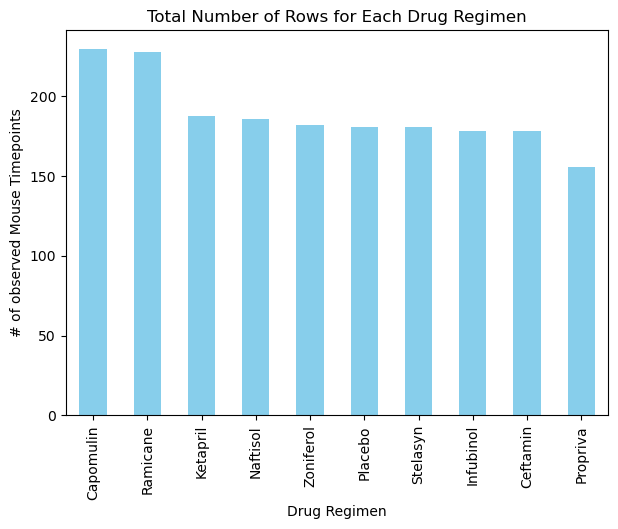

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Group by 'Drug Regimen' and count the number of rows for each regimen
regimen_counts = clean_mouse_results_df['Drug Regimen'].value_counts()

# Generate the bar plot
plt.figure(figsize=(7, 5))
regimen_counts.plot(kind='bar', color='Skyblue')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

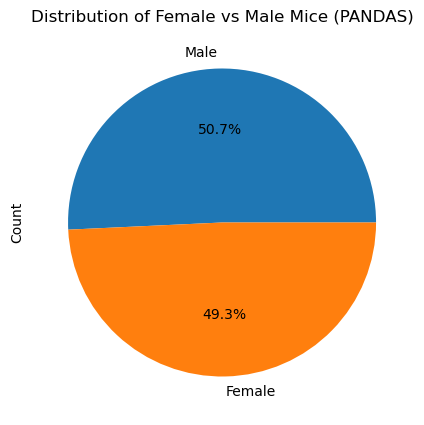

In [39]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart

# Get the unique counts of female and male mice
gender_counts = clean_mouse_results_df['Sex'].value_counts()



# using Pandas' built-in plotting function to create the bar plot.
gender_counts.plot(
    kind='pie', 
    autopct='%1.1f%%',  # Show percentages with one decimal place
    startangle=0,      
    shadow=False,        
    figsize=(10, 5), 
    title='Distribution of Female vs Male Mice (PANDAS)', 
    xlabel='', 
    ylabel='Count', 
    rot=45
)

# Display the pie chart
plt.show()


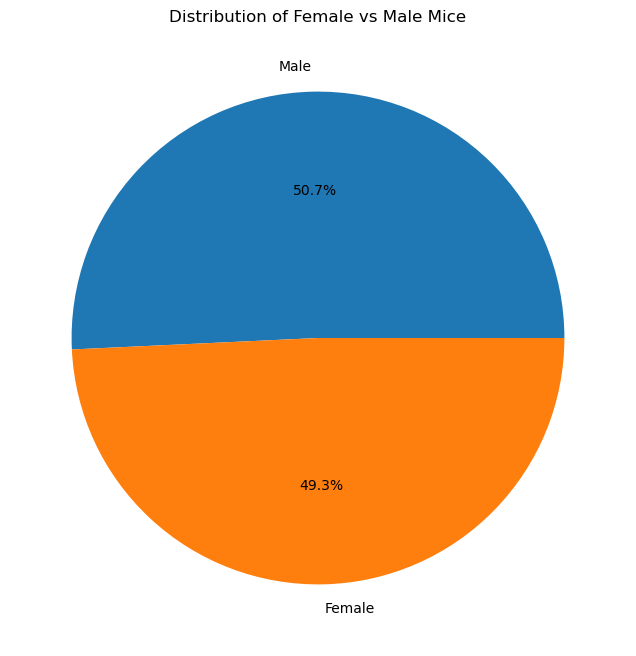

In [38]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart



# Get the unique counts of female and male mice
gender_counts = clean_mouse_results_df['Sex'].value_counts()

# Generate the pie chart using PyPlot
plt.figure(figsize=(8, 8))  
plt.pie(
    gender_counts, 
    labels=gender_counts.index,  # Use the index for labels
    autopct='%1.1f%%',           # Show percentages with one decimal place
    startangle=0,               
    shadow=False                  
)

# Set the title
plt.title('Distribution of Female vs Male Mice')

# Display the pie chart
plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


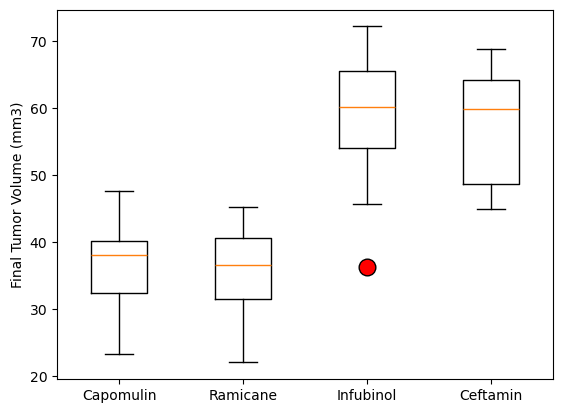

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

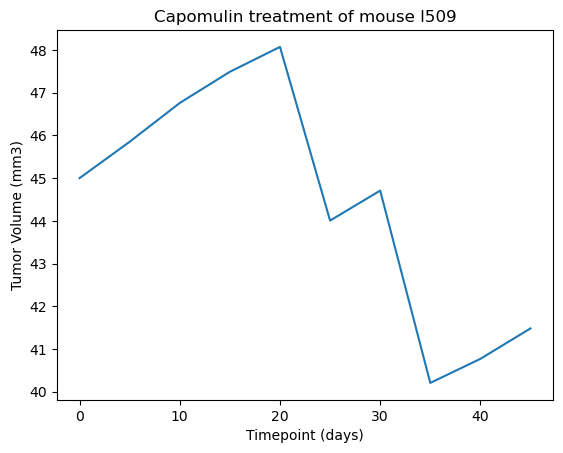

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


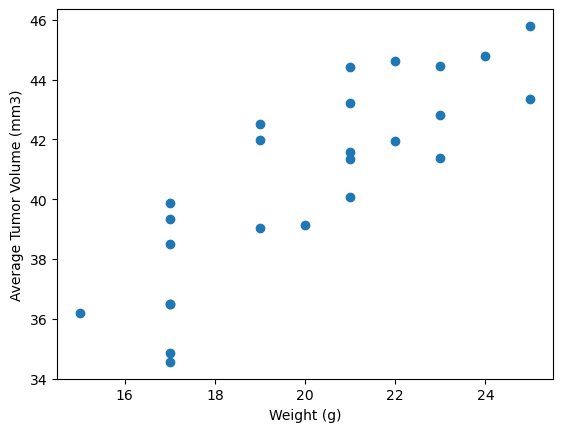

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


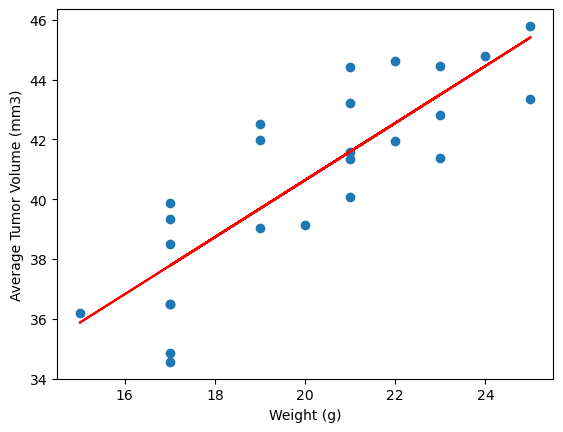

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
